In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
!pip install -q keras

In [75]:
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [76]:
# Resize all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Test'

In [77]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [78]:
# Don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [79]:
# useful for getting number of output classes
from glob import glob
folders = glob('/content/drive/MyDrive/Dataset/*')

In [80]:
folders

['/content/drive/MyDrive/Dataset/Train', '/content/drive/MyDrive/Dataset/Test']

In [81]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [82]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [83]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [84]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [85]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [86]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
training_set
test_set

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [87]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 7s 476ms/step - loss: 1.8470 - accuracy: 0.4953 - val_loss: 1.2898 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 6s 459ms/step - loss: 1.0761 - accuracy: 0.6198 - val_loss: 0.7015 - val_accuracy: 0.6269
Epoch 3/10
13/13 [==============================] - 6s 459ms/step - loss: 0.4845 - accuracy: 0.7655 - val_loss: 0.5566 - val_accuracy: 0.7164
Epoch 4/10
13/13 [==============================] - 6s 461ms/step - loss: 0.3753 - accuracy: 0.8325 - val_loss: 0.4225 - val_accuracy: 0.7687
Epoch 5/10
13/13 [==============================] - 6s 459ms/step - loss: 0.3524 - accuracy: 0.8637 - val_loss: 0.4144 - val_accuracy: 0.7612
Epoch 6/10
13/13 [==============================] - 6s 454ms/step - loss: 0.3020 - accuracy: 0.9006 - val_loss: 0.4542 - val_accuracy: 0.8060
Epoch 7/10
13/13 [==============================] - 6s 454ms/step - loss: 0.2836 - accuracy: 0.8932 - val_loss: 0.4318 - val_accuracy: 0.8060
Epoch 

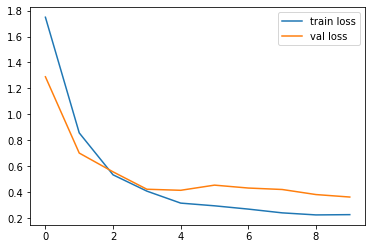

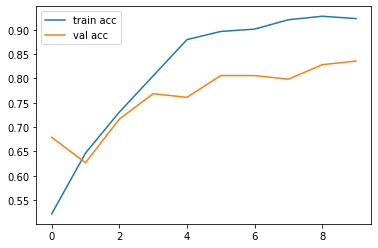

<Figure size 432x288 with 0 Axes>

In [88]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [89]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [90]:
y_pred = model.predict(test_set)
y_pred

array([[7.21524537e-01, 2.78475493e-01],
       [9.14891362e-01, 8.51085782e-02],
       [3.07071954e-01, 6.92928076e-01],
       [8.52705240e-01, 1.47294804e-01],
       [5.39147139e-01, 4.60852861e-01],
       [7.07600951e-01, 2.92399019e-01],
       [9.43543255e-01, 5.64567782e-02],
       [4.55945492e-01, 5.44054508e-01],
       [4.36432511e-01, 5.63567519e-01],
       [2.36304253e-01, 7.63695717e-01],
       [5.77724874e-01, 4.22275156e-01],
       [9.63907003e-01, 3.60930413e-02],
       [7.45837450e-01, 2.54162610e-01],
       [1.86316192e-01, 8.13683808e-01],
       [8.05514455e-01, 1.94485560e-01],
       [3.91836315e-01, 6.08163714e-01],
       [9.94636595e-01, 5.36342105e-03],
       [9.75829363e-01, 2.41706427e-02],
       [6.04367018e-01, 3.95632982e-01],
       [1.86349094e-01, 8.13650906e-01],
       [1.00352012e-01, 8.99648011e-01],
       [9.99737680e-01, 2.62304820e-04],
       [2.28909969e-01, 7.71090031e-01],
       [3.21519822e-01, 6.78480148e-01],
       [7.396165

In [91]:
from tensorflow.keras.models import load_model
model=load_model('model_vgg19.h5')

In [92]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_205.png',target_size=(224,224))

In [93]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [94]:
x.shape

(224, 224, 3)

In [95]:
x=x/255

In [96]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [97]:
model.predict(img_data)

array([[0.0108006, 0.9891994]], dtype=float32)

In [98]:
a=np.argmax(model.predict(img_data), axis=1)

In [99]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
